In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

In [2]:
def testC(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)
    bag = BaggingClassifier().fit(X_train, y_train)
    y_pred =  bag.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

def testR(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    lr = LinearRegression().fit(X_train, y_train)
    print(lr.score(X_test, y_test))

In [3]:
data_regression = pd.read_csv("../data/kc_house_data.csv").sample(15000)
data_classification = pd.read_csv("../data/card_transdata.csv").sample(15000)

In [4]:
data_classification['used_chip'] = data_classification['used_chip'].astype(int)
data_classification['repeat_retailer'] = data_classification['repeat_retailer'].astype(int)
data_classification['used_pin_number'] = data_classification['used_pin_number'].astype(int)
data_classification['online_order'] = data_classification['online_order'].astype(int)
data_classification['fraud'] = data_classification['fraud'].astype(int)

data_regression = data_regression.drop(["date","id"], axis = 1)

In [5]:
y_regression = data_regression["price"]

X_regression = data_regression.drop(columns = ['price'])
X_scaled = MinMaxScaler().fit_transform(X_regression)
X_regression = pd.DataFrame(X_scaled, columns=X_regression.columns)

y_classification = data_classification['fraud']

X_classification = data_classification.drop(columns = ['fraud'])
X_scaled = MinMaxScaler().fit_transform(X_classification)
X_classification = pd.DataFrame(X_scaled, columns=X_classification.columns)

In [6]:
testR(X_regression, y_regression)

0.7022945495424668


In [7]:
testC(X_classification, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2054
           1       0.99      0.98      0.99       196

    accuracy                           1.00      2250
   macro avg       1.00      0.99      0.99      2250
weighted avg       1.00      1.00      1.00      2250

[[2053    1]
 [   3  193]]


In [8]:
X_regression.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.306297,0.264758,0.152341,0.008585,0.198747,0.007600,0.057717,0.601333,0.555056,0.181226,0.083615,0.617511,0.042133,0.390460,0.647025,0.253333,0.265287,0.013669
std,0.082677,0.096463,0.078321,0.023939,0.215892,0.086849,0.190833,0.160986,0.098291,0.100251,0.127176,0.256141,0.199917,0.271316,0.224057,0.117458,0.119462,0.031017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.218750,0.096088,0.002738,0.000000,0.000000,0.000000,0.500000,0.500000,0.108696,0.000000,0.443478,0.000000,0.161616,0.503534,0.157938,0.177391,0.005100
50%,0.272727,0.281250,0.137755,0.004289,0.200000,0.000000,0.000000,0.500000,0.500000,0.153382,0.000000,0.652174,0.000000,0.323232,0.665258,0.239401,0.238261,0.007961
75%,0.363636,0.312500,0.193027,0.006122,0.400000,0.000000,0.000000,0.750000,0.583333,0.231884,0.160920,0.843478,0.000000,0.590909,0.837342,0.326891,0.332174,0.010766
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_classification.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.014717,0.006024,0.010779,0.882267,0.344267,0.102200,0.656800
std,0.035459,0.023166,0.018073,0.322303,0.475144,0.302921,0.474793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002128,0.000351,0.002745,1.000000,0.000000,0.000000,0.000000
50%,0.005433,0.001182,0.005914,1.000000,0.000000,0.000000,1.000000
75%,0.014187,0.003994,0.012491,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Всё для классификации

In [10]:
vt = VarianceThreshold(0.15)
X_vt = vt.fit_transform(X_classification)
X_vt.shape

(15000, 2)

In [11]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head(5)

,used_chip,online_order
0,0.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0


In [12]:
testC(X_vt, y_classification)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2054
           1       0.00      0.00      0.00       196

    accuracy                           0.91      2250
   macro avg       0.46      0.50      0.48      2250
weighted avg       0.83      0.91      0.87      2250

[[2054    0]
 [ 196    0]]


C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Зато осталось всего 2 признака))))

In [13]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X_classification, y_classification)
X_skb.shape

(15000, 2)

In [14]:
testC(X_skb, y_classification)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2054
           1       0.75      0.70      0.72       196

    accuracy                           0.95      2250
   macro avg       0.86      0.84      0.85      2250
weighted avg       0.95      0.95      0.95      2250

[[2007   47]
 [  58  138]]


ну тут получше))))

In [15]:
tree = DecisionTreeClassifier().fit(X_classification, y_classification)

In [16]:
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_classification, y_classification)
X_rfe = pd.DataFrame(rfe.transform(X_classification), columns=rfe.get_feature_names_out())
X_rfe

,distance_from_home,ratio_to_median_purchase_price
0,0.002727,0.001985
1,0.002082,0.003036
2,0.000845,0.006092
3,0.032340,0.006288
4,0.032587,0.003566
...,...,...
14995,0.001481,0.011308
14996,0.000835,0.007045
14997,0.001297,0.002820
14998,0.000160,0.010242


In [17]:
testC(X_rfe, y_classification)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2054
           1       0.54      0.50      0.52       196

    accuracy                           0.92      2250
   macro avg       0.75      0.73      0.74      2250
weighted avg       0.92      0.92      0.92      2250

[[1971   83]
 [  98   98]]


+-как предыдущая модель

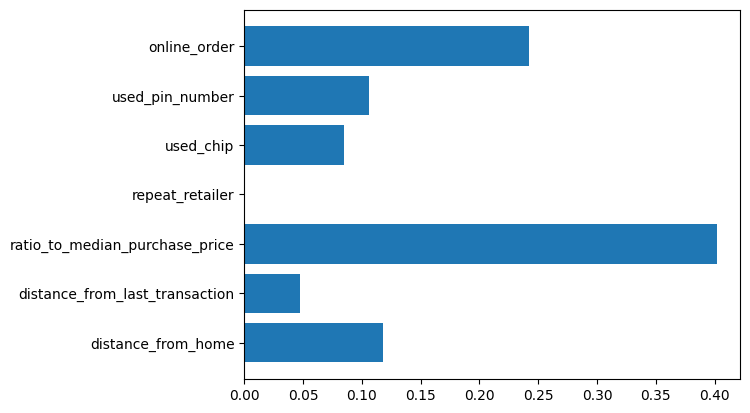

In [18]:
plt.barh(width=tree.feature_importances_, y=X_classification.columns);

По приколу посмотрели на значимость признаков

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_classification, y_classification)
X_pca.shape

(15000, 2)

In [20]:
sum(pca.explained_variance_ratio_)

0.6954561830815421

сохранили 70 процентов инфы, при этом датасет уменьшился в многамнога раз. Ура, товарисчи!

In [22]:
testC(X_pca, y_classification)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2054
           1       0.94      0.93      0.94       196

    accuracy                           0.99      2250
   macro avg       0.97      0.96      0.96      2250
weighted avg       0.99      0.99      0.99      2250

[[2043   11]
 [  14  182]]


УАУАУАУАУАУАУАУАУАУАУАУАУАУАУУ, НА РАДОСТЯХ НАРИСУЮ ГРАФИК

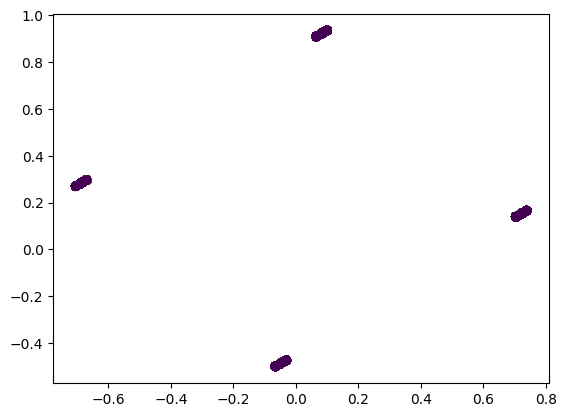

In [23]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_classification);

мне страшно, давайте дальше

In [24]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_classification)

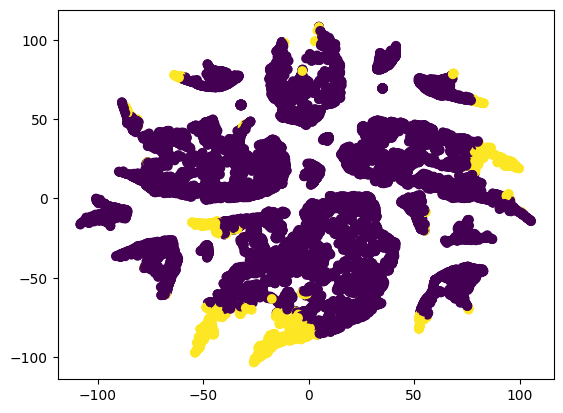

In [25]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_classification);

In [26]:
testC(X_tsne, y_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2054
           1       0.96      0.96      0.96       196

    accuracy                           0.99      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

[[2046    8]
 [   7  189]]


Девочки, я в шоке....

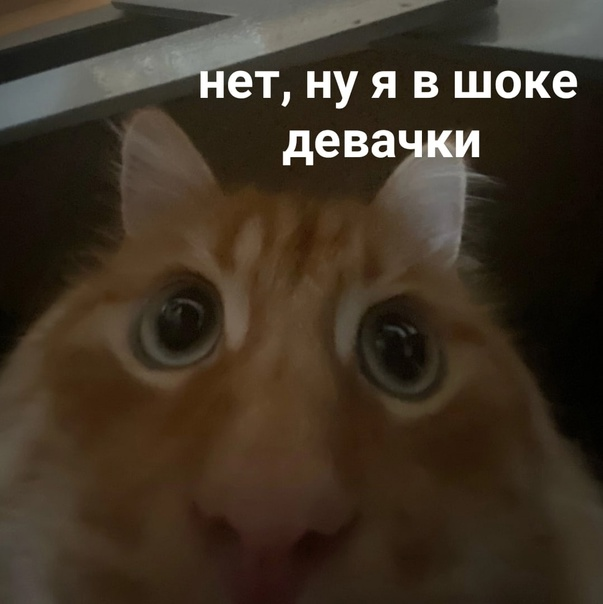

In [27]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_classification)

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 16 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.fla

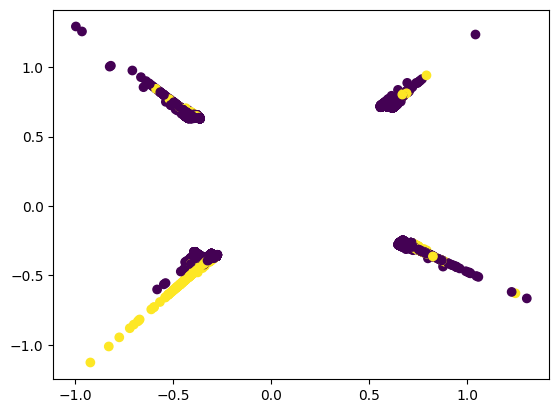

In [28]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y_classification);

In [29]:
testC(X_isomap, y_classification)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2054
           1       0.86      0.70      0.77       196

    accuracy                           0.96      2250
   macro avg       0.92      0.84      0.88      2250
weighted avg       0.96      0.96      0.96      2250

[[2032   22]
 [  59  137]]


После прошлого я уже не удивлён.

## С довольным лицом сделаем всё то же самое для регрессии))))))

In [30]:
vt = VarianceThreshold(0.05)
X_vt = vt.fit_transform(X_regression)
X_vt.shape

(15000, 3)

In [31]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head(5)

,yr_built,zipcode,lat
0,0.513043,0.025253,0.635197
1,0.182609,0.515152,0.836042
2,0.973913,0.186869,0.314105
3,0.260870,0.722222,0.685570
4,1.000000,0.722222,0.711570


In [32]:
testR(X_vt, y_regression)

0.12293020321297943


In [33]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X_regression, y_regression)
X_skb.shape

(15000, 2)

In [34]:
testR(X_skb, y_regression)

0.5264766310449192


In [35]:
tree = DecisionTreeClassifier().fit(X_regression, y_regression)

In [36]:
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_regression, y_regression)
X_rfe = pd.DataFrame(rfe.transform(X_regression), columns=rfe.get_feature_names_out())
X_rfe

,lat,sqft_lot15
0,0.635197,0.009833
1,0.836042,0.003515
2,0.314105,0.004748
3,0.685570,0.003837
4,0.711570,0.001369
...,...,...
14995,0.865941,0.005101
14996,0.481150,0.120833
14997,0.370816,0.011628
14998,0.541274,0.005215


In [37]:
testR(X_rfe, y_regression)

0.11424757036693911


In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_regression, y_regression)
X_pca.shape

(15000, 2)

In [39]:
sum(pca.explained_variance_ratio_)

0.4602379022378051

тут уже печальней, но всё равно окээээй

In [40]:
testR(X_pca, y_regression)

0.2044190173180166


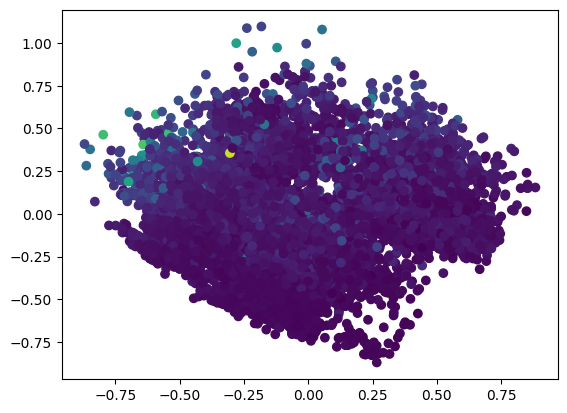

In [41]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_regression);

In [42]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_regression)

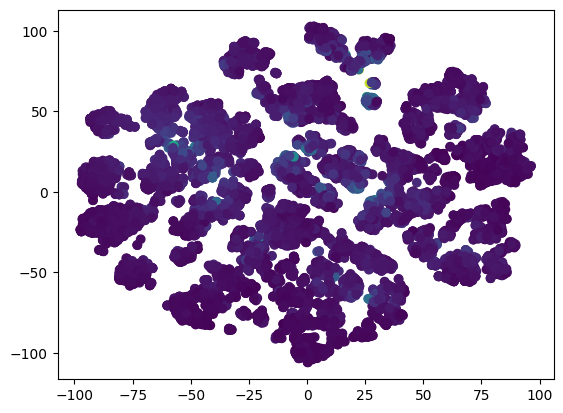

In [43]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_regression);

In [44]:
testR(X_tsne, y_regression)

0.07095010488496944


In [45]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_regression)

C:\Users\1\Jupyter Notebook\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 5 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\1\Jupyter Notebook\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat

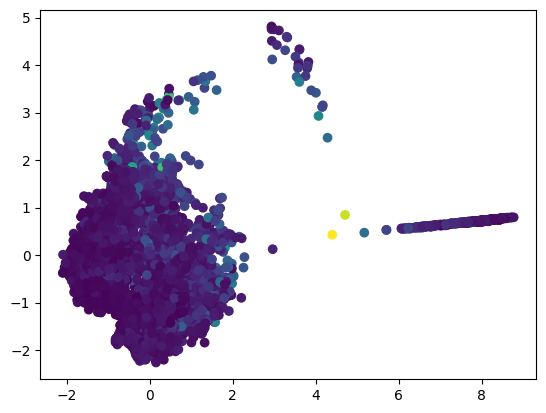

In [46]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y_regression);

In [47]:
testR(X_isomap, y_regression)

0.14392760361838586


нууууу, нелинейные методы и линейная регрессия не дружат)
SelectKBest справился лучше всех

Реализация будет после нг. чееееестно

## PCA

In [ ]:
class myPCA:
    def __init__(self, n_components = 2):
        self.n_components = n_components

    def fit_transform(self, X):
        covmat = np.cov(X)
        print(covmat.shape())
        _, vecs = np.linalg.eig(covmat)
        v = -vecs[:,1]
        print(X.shape())
        Xnew = np.dot(v,X.T)
        return Xnew

In [ ]:
mypcaX = myPCA(2).fit_transform(X_classification)
mypcaX

In [ ]:
mypcaX[0]

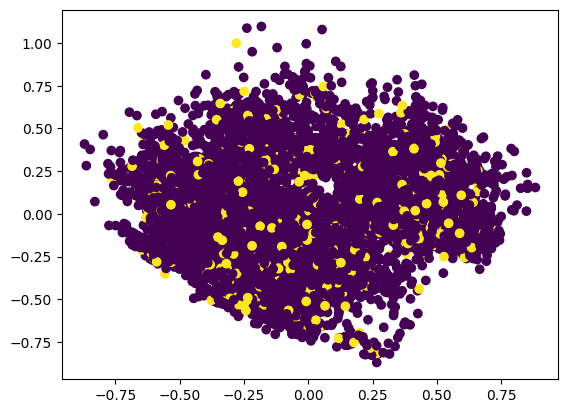

In [52]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_classification);

In [53]:
plt.scatter(mypcaX[:,0], mypcaX[:,1], c=y_classification);

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed